## EDA of King County Housing Data for Buying a House in Seattle

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Images/Seattle.jpeg", width = 600)

## Introduction

Exploratory data Analysis of King County Housing Data:

Source : King_County_House_prices_dataset.csv

This dataset contains information about house sale prices for King County (Seattle), sold between May 2014 and May 2015 .

**Business Need**

To find out three best suggestions for buying a house in Seattle. 
Stake holder is Nicole Johnson and she wants a house with following criterea.
1. The house should be lively
2. Near to the central neighbourhood
3. Middle price range 
4. Right timing to buy - within a year

## Importing the modules

In [42]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = "{:,.2f}".format

In [43]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


## Understanding and reading the data

In [44]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [45]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,NaN,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


**Checking the number of rows and columns of the DataFrame**

In [46]:
df.shape

(21597, 21)

**Checking for the column names**

In [47]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Checking the information about the type of the data**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Here it shows that the column 'date' is an object type and for our further analysis date should be changed to datetime type.

**Checking the descriptive statistics of the dataset**

In [49]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,534.00","21,597.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00","1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00","1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00","1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


**Checking for the missing values**

In [50]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Here it shows the null values for columns 'waterfront' has 2376 , for 'view' 63 and for 'yr_renovated' 3842 respectively

## Initial hypotheses / Assumptions about the dataset

1. what is the average price of the house in Seattle
2. Is there any price difference for houses with same squarefeet with different age?
3. What is the price difference of houses in the city and remote?
4. Does price inrease with increasing bedrooms of houses?
5. What are the ages of houses?

**Hypotheses which fit to the Stakeholders need** 

1. Which is the most populated place (zipcode)/ most houses are situated in Seattle?
2. What is the price comparison with square feet in most populated place?
3. Is there any correlation of price, age and square feet of houses?

## Exploring the data

**Checking the duplicate files**  

In [51]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

**Transforming the data types**  

The date is changed from object to datetime format

In [52]:
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,NaN,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


**Adding a column of age and removing the 'date' column from the dataset**

In [54]:
df['date_yr'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df['age'] = df['date_yr'] - df['yr_built']
df = df.drop(['date'], axis = 1)

In [55]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,date_month,age
0,7129300520,"221,900.00",3,1.00,1180,5650,1.00,NaN,0.00,3,...,1955,0.00,98178,47.51,-122.26,1340,5650,2014,10,59
1,6414100192,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,...,1951,"1,991.00",98125,47.72,-122.32,1690,7639,2014,12,63
2,5631500400,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,...,1933,NaN,98028,47.74,-122.23,2720,8062,2015,2,82
3,2487200875,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,...,1965,0.00,98136,47.52,-122.39,1360,5000,2014,12,49
4,1954400510,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,...,1987,0.00,98074,47.62,-122.05,1800,7503,2015,2,28


## General analysis of the Data

**A geographical map view of houses to be sold in Seattle**

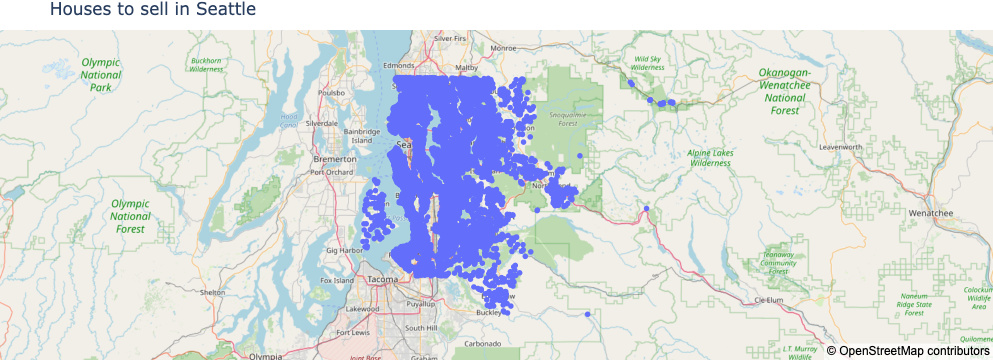

In [56]:
fig = px.scatter_mapbox(df, lat="lat", lon="long", center={'lat':47.47, 'lon':-122.0},
                        zoom=7.5, height=300, width=600, title="Houses to sell in Seattle")
fig.update_layout(mapbox_style="open-street-map")
# earth background
fig.update_layout(
    mapbox_style="open-street-map",
    )
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # enlarges white area around map
fig.show()
fig.write_image('Images/map1_general.png')

**What is the average price of houses?**

<Figure size 1008x792 with 0 Axes>

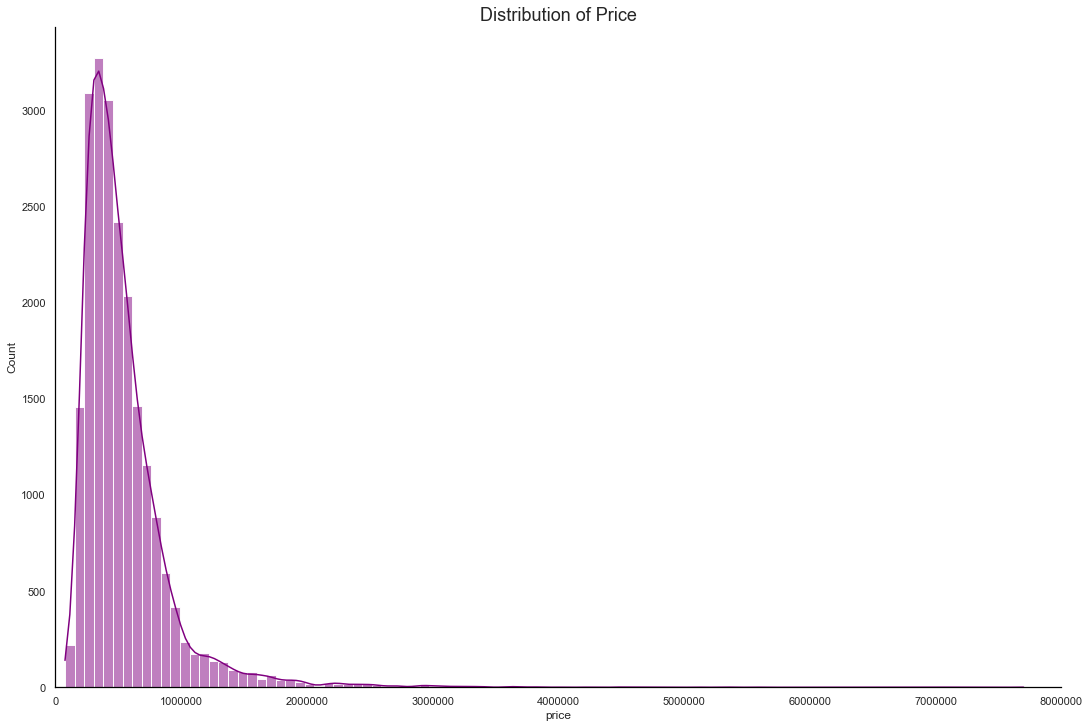

In [57]:
plt.figure(figsize=(14, 11))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5, color='purple')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,8000000)
plt.xlabel='price $'
plt.title("Distribution of Price", fontsize=18)
plt.savefig("images/fig1_Gen_Price_distribution.png")

Here we can see that the prices are skewed to right. 
Prices of houses are distributed in the range of  250k - 1000k USD

**What are the age range of houses?**

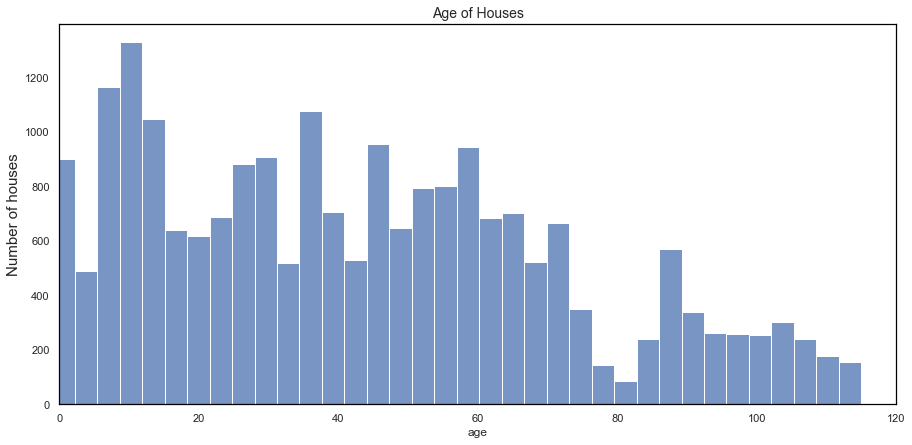

In [58]:
plt.figure(figsize = (15,7))
plt.subplot(1,1,1)
sns.histplot(x = 'age', data = df)
#plt.xlabel('Age of House', fontsize=15)
plt.ylabel('Number of houses', fontsize=15)
plt.title("Age of Houses", fontsize=14)
plt.xlim(0,120)
plt.savefig("images/fig2_Gen_Age_distribution.png")
plt.show()

From the scatter plot and the histogram, the age of houses are distributed approaximately from 0 to 118

**Distribution of square feet with respect to price**

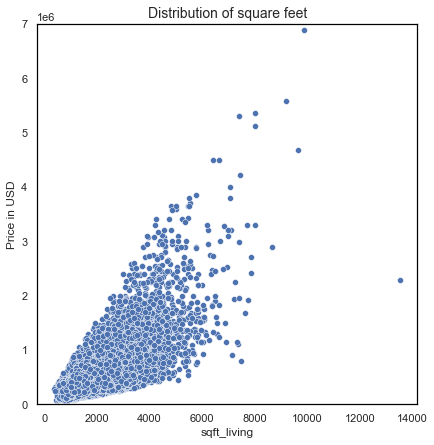

In [59]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.ylabel('Price in USD')
plt.title("Distribution of square feet", fontsize=14)
plt.savefig("images/fig3_Gen_Squareft_price.png")
plt.ylim(0,7000000);

The above graph shows that the price of the houses increases with increase in square feet.

**Number of bedrooms in the houses**

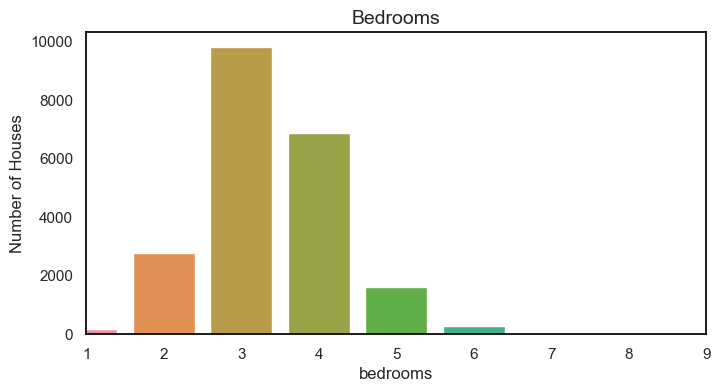

In [60]:
#  explore the number of bedrooms
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'bedrooms')
plt.ylabel('Number of Houses')
#plt.xlabel('Number of Bedrooms')
plt.xlim(0,8)
plt.title("Bedrooms", fontsize=14)
plt.savefig("images/fig4_Gen_Bedrooms.png")
plt.show()

The graph shows that most of the houses have 3 bedrooms in it.

## Cleaning the data

**Dropping the columns we don't need**

In [61]:
df.drop(["bedrooms","bathrooms", "sqft_lot","date_month","yr_built", "floors", "waterfront", "view", "sqft_basement", "condition", "yr_renovated", "sqft_living15", "sqft_lot15", "sqft_above"], axis=1, inplace=True)
df.head()

,id,price,sqft_living,grade,zipcode,lat,long,date_yr,age
0,7129300520,"221,900.00",1180,7,98178,47.51,-122.26,2014,59
1,6414100192,"538,000.00",2570,7,98125,47.72,-122.32,2014,63
2,5631500400,"180,000.00",770,6,98028,47.74,-122.23,2015,82
3,2487200875,"604,000.00",1960,7,98136,47.52,-122.39,2014,49
4,1954400510,"510,000.00",1680,8,98074,47.62,-122.05,2015,28


In [62]:
df.describe()

,id,price,sqft_living,grade,zipcode,lat,long,date_yr,age
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57","2,080.32",7.66,"98,077.95",47.56,-122.21,"2,014.32",43.32
std,"2,876,735,715.75","367,368.14",918.11,1.17,53.51,0.14,0.14,0.47,29.38
min,"1,000,102.00","78,000.00",370.00,3.00,"98,001.00",47.16,-122.52,"2,014.00",-1.00
25%,"2,123,049,175.00","322,000.00","1,430.00",7.00,"98,033.00",47.47,-122.33,"2,014.00",18.00
50%,"3,904,930,410.00","450,000.00","1,910.00",7.00,"98,065.00",47.57,-122.23,"2,014.00",40.00
75%,"7,308,900,490.00","645,000.00","2,550.00",8.00,"98,118.00",47.68,-122.12,"2,015.00",63.00
max,"9,900,000,190.00","7,700,000.00","13,540.00",13.00,"98,199.00",47.78,-121.31,"2,015.00",115.00


## Hypotheses 1: Which is the most populated place in Seattle?

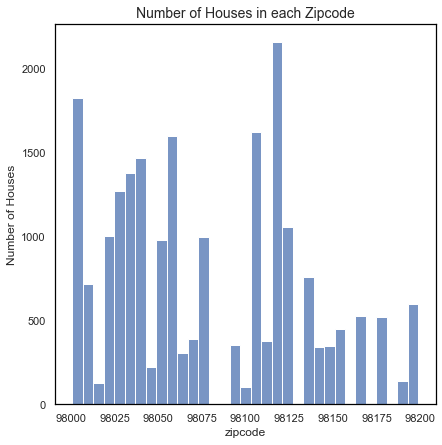

In [63]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(x = 'zipcode', data = df)
plt.ylabel('Number of Houses')
#plt.xlabel('Zipcode')
plt.title("Number of Houses in each Zipcode", fontsize=14)
plt.savefig("images/fig5_Zipcode_houses.png")
plt.show()

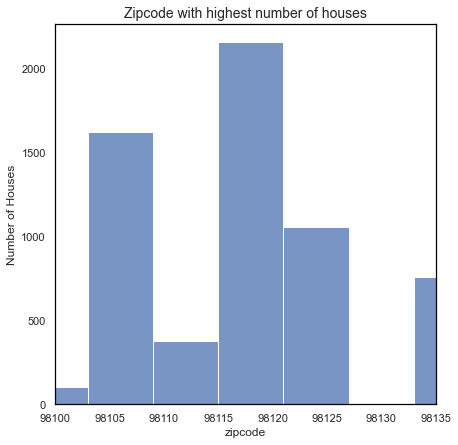

In [64]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(x = 'zipcode', data = df)
plt.xlim(98100,98135)
plt.ylabel('Number of Houses')
plt.title("Zipcode with highest number of houses", fontsize=14)
plt.savefig("images/fig6_Zipcode_houses.png")
plt.show()

#f1 = sns.histplot(x = 'zipcode', data = df)
#f1.set_xlim(98100,98135)
#f1.set_ylabel('Number')

The histogram shows that 98115 has the highest number of houses.

**Extracting zipcode 98115 from the table**

In [65]:
df2 = df.query('zipcode == 98115')
df2

,id,price,sqft_living,grade,zipcode,lat,long,date_yr,age
11,9212900260,"468,000.00",1160,7,98115,47.69,-122.29,2014,72
28,5101402488,"438,000.00",1520,7,98115,47.70,-122.30,2014,66
35,9547205180,"696,000.00",2300,8,98115,47.68,-122.31,2014,84
48,9215400105,"450,000.00",1250,7,98115,47.68,-122.30,2015,62
63,9528102996,"549,000.00",1540,8,98115,47.68,-122.32,2014,0
...,...,...,...,...,...,...,...,...,...
21322,525049174,"435,000.00",1180,7,98115,47.68,-122.31,2015,7
21336,7169500130,"495,000.00",1460,8,98115,47.68,-122.30,2014,9
21348,8024200684,"419,500.00",1400,8,98115,47.70,-122.32,2014,7
21409,8924100308,"1,050,000.00",3260,9,98115,47.68,-122.27,2015,8


**Filtering the price, square feet and age in 98115 from the main DataFrame**

In [66]:
#df3 = new_zipcode
df3 = df[df["zipcode"]==98115]
df3[["zipcode","price", "sqft_living", "age"]]

,zipcode,price,sqft_living,age
11,98115,"468,000.00",1160,72
28,98115,"438,000.00",1520,66
35,98115,"696,000.00",2300,84
48,98115,"450,000.00",1250,62
63,98115,"549,000.00",1540,0
...,...,...,...,...
21322,98115,"435,000.00",1180,7
21336,98115,"495,000.00",1460,9
21348,98115,"419,500.00",1400,7
21409,98115,"1,050,000.00",3260,8


## Hypotheses 2: What is the average price of house in 98115?

**Statistical distribution of price, square feet and age in 98115**

In [67]:
df3[["zipcode","price", "sqft_living", "age"]].describe()

,zipcode,price,sqft_living,age
count,583.00,583.00,583.00,583.00
mean,"98,115.00","619,944.15","1,835.30",65.39
std,0.00,"237,505.44",722.97,28.41
min,"98,115.00","200,000.00",620.00,0.00
25%,"98,115.00","456,750.00","1,270.00",56.50
50%,"98,115.00","567,000.00","1,710.00",69.00
75%,"98,115.00","719,000.00","2,285.00",87.50
max,"98,115.00","2,300,000.00","5,770.00",115.00


From the above table, we can see the mean of the price is ≈ 619,944.15 USD.
As the stakeholder wants a medium prized house, we can filter the price of the house in the range of 500,000 USD, 700,000 USD

## Hypotheses 3: What is the correlation between price, squarefeet and age?

 **Calculating the approaximate square feet which matches the mean of the price**

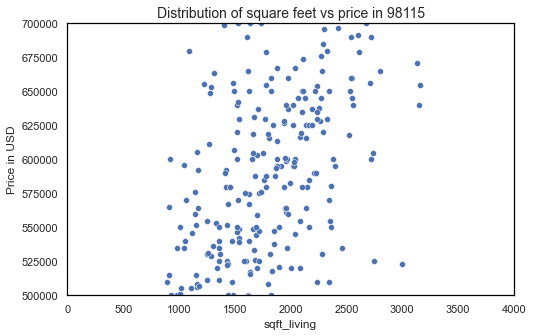

In [68]:
#plt.figure(figsize = (15,7))
#plt.subplot(1,1,1)
sns.scatterplot(data=df3, x='sqft_living', y='price')
plt.ylabel('Price in USD')
plt.title("Distribution of square feet vs price in 98115", fontsize=14)
plt.ylim(500000,700000)
plt.savefig("images/fig7_sqVSprice_98115.png")
plt.xlim(0,4000);

The plot gives an idea of square feet lesser than 3000 has approaximate mean price or less.

 **Comparison of age and square feet**

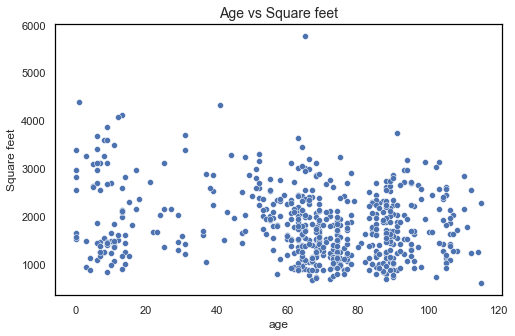

In [69]:
#plt.figure(figsize = (15,7))
#plt.subplot(1,2,1)
sns.scatterplot(x = 'age', y = 'sqft_living', data = df3)
plt.ylabel('Square feet')
#plt.xlabel('Zipcode')
plt.title("Age vs Square feet", fontsize=14)
plt.savefig("images/fig8_sqVSage_98115.png")
plt.show()

Scatter plot shows that most houses which has highest square feet are age less than 20 years.

 **Comparison of age and price**

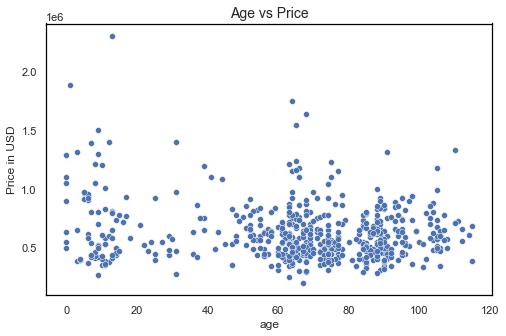

In [70]:
#plt.figure(figsize = (15,7))
#plt.subplot(1,2,1)
sns.scatterplot(x = 'age', y = 'price', data = df3)
plt.ylabel('Price in USD')
#plt.xlabel('Zipcode')
plt.title("Age vs Price", fontsize=14)
plt.savefig("images/fig9_ageVSprice_98115.png")
plt.show()

There is no correlation between age and price.

## Recommendations for the stakeholder

As the stakeholder needs a lively house, which means that it can be a mordern house. 
Considering this need, the age of the house can be taken below 10 years.
Hence the data is filtered by a price range from 500,000 to 700,000 $, squarefeet below 3000 and age below 10. 

In [71]:
#df4 = new_filtered_table 
df4 = df[(df["zipcode"]==98115) & (df["price"]<=700000) & (df["sqft_living"]<=3000) & (df["age"]>=0) & (df["age"]<=10)]
df4 = df4[["id","zipcode","price", "sqft_living", "age", "lat", "long"]]
df4

,id,zipcode,price,sqft_living,age,lat,long
63,9528102996,98115,"549,000.00",1540,0,47.68,-122.32
2922,2274000026,98115,"353,000.00",1250,10,47.70,-122.32
4150,8077100031,98115,"631,000.00",1670,0,47.68,-122.29
6078,8641500280,98115,"270,000.00",840,9,47.70,-122.30
10825,6844700510,98115,"700,000.00",2672,9,47.70,-122.29
15595,1797500780,98115,"540,000.00",1470,7,47.67,-122.32
18341,8641500252,98115,"403,000.00",1502,10,47.70,-122.31
19699,7169500200,98115,"522,500.00",1430,9,47.68,-122.30
19749,5100400251,98115,"390,000.00",962,3,47.69,-122.31
19850,8024200677,98115,"415,000.00",1270,8,47.70,-122.32


In [72]:
df4.describe()

,id,zipcode,price,sqft_living,age,lat,long
count,29.00,29.00,29.00,29.00,29.00,29.00,29.00
mean,"6,472,667,969.17","98,115.00","475,213.31","1,396.10",6.62,47.69,-122.31
std,"2,793,969,208.47",0.00,"100,021.07",344.03,3.04,0.01,0.01
min,"328,000,182.00","98,115.00","270,000.00",840.00,0.00,47.67,-122.33
25%,"5,100,400,244.00","98,115.00","415,000.00","1,250.00",6.00,47.68,-122.32
50%,"7,410,200,431.00","98,115.00","440,000.00","1,408.00",7.00,47.69,-122.32
75%,"8,077,100,031.00","98,115.00","540,000.00","1,502.00",9.00,47.70,-122.30
max,"9,528,102,996.00","98,115.00","700,000.00","2,672.00",10.00,47.70,-122.27


**Comparing price vs age**

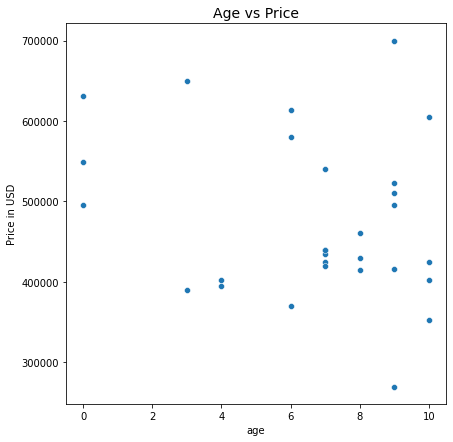

In [33]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.scatterplot(x = 'age', y = 'price', data = df4)
plt.ylabel('Price in USD')
#plt.xlabel('Zipcode')
plt.title("Age vs Price", fontsize=14)
plt.savefig("images/fig10_ageVSprice_final.png")
plt.show()

There is no trend can be seen on age against price. 

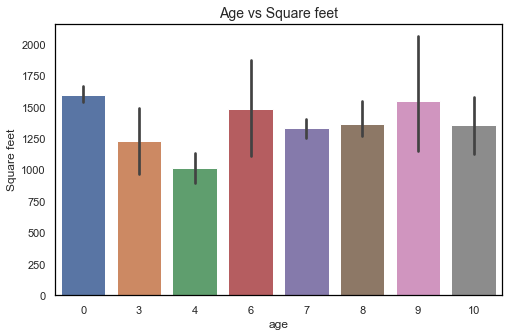

In [73]:
#plt.figure(figsize = (15,7))
#plt.subplot(1,2,1)
sns.barplot(x = 'age', y = 'sqft_living', data = df4)
plt.ylabel('Square feet')
#plt.xlabel('Zipcode')
plt.title("Age vs Square feet", fontsize=14)
plt.savefig("images/fig11_ageVSsq_final.png")
plt.show()

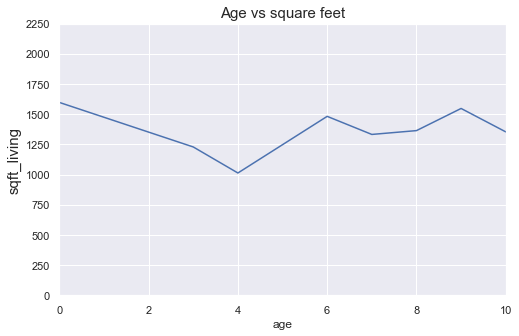

In [74]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df4, x="age", y="sqft_living", ci=None)  # ci removes the shading, estimator sets the calculation of average
plt.ylabel('sqft_living', fontsize=15)
plt.title('Age vs square feet', fontsize=15)
plt.xlim(0,10)
plt.ylim(0,2250)
plt.savefig("images/fig12_ageVSsq_final_line.png")

**Correlation between Price, squarefeet and age of houses**

In [75]:
# correlation 
df4.corr()['price'].sort_values()

lat           -0.47
age           -0.25
id             0.17
long           0.30
sqft_living    0.80
price          1.00
zipcode         NaN
Name: price, dtype: float64

**correlation matrix between columns**

In [76]:
# correlation matrix between columns
corr_columns=["price", "sqft_living","age"]
corr_mtrx=df4[corr_columns].corr()
corr_mtrx

,price,sqft_living,age
price,1.00,0.80,-0.25
sqft_living,0.80,1.00,0.01
age,-0.25,0.01,1.00


## Correlation Heatmap

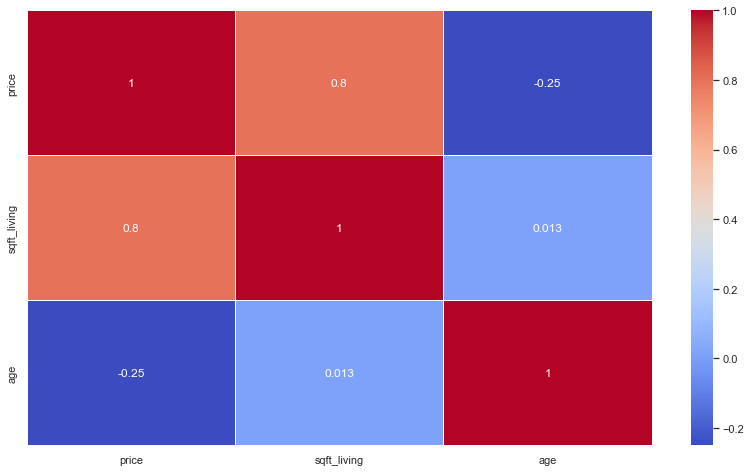

In [77]:
plt.figure(figsize = (14,8))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')
plt.savefig("images/fig13_heatmap.png")

There is a correlation between price and square feet (correlation value = 0.80) and as age has the value -0.25, it shows no correlation with price 

## Geographical Map of houses for recommendation

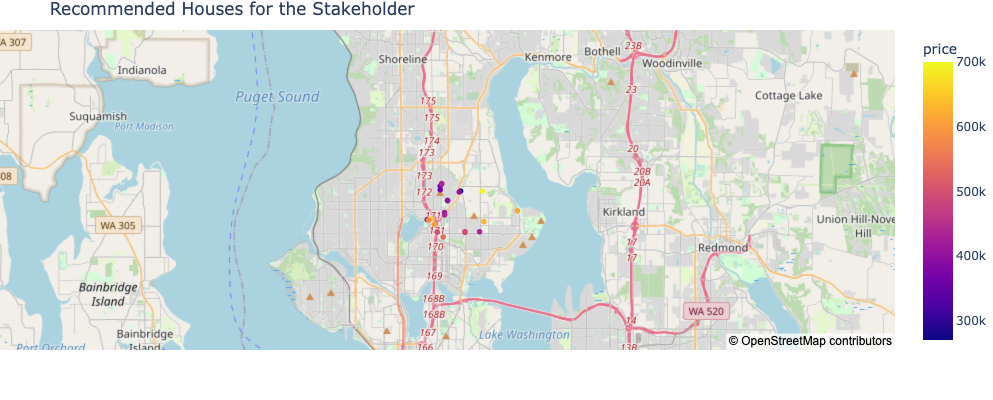

In [78]:
fig.update_layout(mapbox_style="open-street-map")
fig = px.scatter_mapbox(df4, lat="lat", lon="long", color="price", center={'lat':47.696, 'lon':-122.313},
                        zoom=10, height=400, width=600, title="Recommended Houses for the Stakeholder")
# earth background
fig.update_layout(
    mapbox_style="open-street-map",
    )

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":50})

fig.show()

fig.write_image("images/map2.png")

## Conclusion

**Recommendations**

1. Price range from 500,000 to 700,000 $
2. Squarefeet below 3000 
3. Age below 10